# Symbolic Aggregate approXimation *(SAX)* Encoding
## Distance Matrix DEMO

In [1]:
# at first time install pynuTS with this command
#!pip install git+https://github.com/nickprock/pynuTS.git@main

  Cloning https://github.com/nickprock/pynuTS.git (to revision main) to /tmp/pip-req-build-8lcxog72
  Running command git clone -q https://github.com/nickprock/pynuTS.git /tmp/pip-req-build-8lcxog72
  Created wheel for pynuTS: filename=pynuTS-0.2.1-py3-none-any.whl size=9446 sha256=c8c4524136f22ed8013ef03e40c7e0b71c83698723edd51232c61128f9825ef0
  Stored in directory: /tmp/pip-ephem-wheel-cache-5642pqez/wheels/59/58/6e/2fb72676efefa1bcc454c7ea3f3939d5cc3245b098efa20f64
Successfully built pynuTS
  Attempting uninstall: pynuTS
    Found existing installation: pynuTS 0.2.0
    Uninstalling pynuTS-0.2.0:
      Successfully uninstalled pynuTS-0.2.0


In [2]:
import pandas as pd
import numpy as np
from pynuTS.decomposition import NaiveSAX

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Symbolic Aggregate approXimation Encoding (SAX Encoding)

* Developed in 2002 by Keogh e Lin
* Dimensionality Reduction for sequences

* In this example we will use it to find anomaly patterns. For more informations read this [KDNuggets article](https://www.kdnuggets.com/2019/09/time-series-baseball.html).

## Create dataset.

We Create 10 sequences with 12 observations.


In [4]:
# Some useful functions
def sigmoid(x, a, b, c):
    expo = a * (b - x)
    sig = 1 / ( 1 + np.exp( expo ) ) * c
    return sig


def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [5]:
time = np.arange(120)

np.random.seed(42)
a = np.random.randn(10)
b = np.random.beta(a[0], a[-1], 10)
c = np.random.normal(loc = 10, scale=0.5,size=10)

list_series = []
for i in range(10):
  noise = white_noise(time)
  temp = sigmoid(time, a[i], b[i], c[i]) + noise
  list_series.append(temp)

### Create DataFrame

* every row is a period
* every column is a sequence

In [6]:
X = pd.DataFrame(list_series).T

In [7]:
X

,0,1,2,3,4,5,6,7,8,9
0,4.332912,5.340084,4.122440,4.239317,4.371593,4.099049,5.578715,4.674864,6.055140,3.331266
1,5.981105,5.252351,5.428331,6.739320,5.756853,4.383853,8.795001,6.223282,3.476268,8.603779
2,7.445490,4.769021,7.628610,9.847054,4.277135,2.838811,8.734536,8.921522,4.000724,6.595531
3,7.892243,4.230149,6.623838,9.734486,6.150913,3.340197,10.425730,7.351580,1.681390,6.593514
4,7.972276,2.274750,7.426929,9.395209,4.161664,2.576507,9.807068,6.987873,2.612775,6.568969
...,...,...,...,...,...,...,...,...,...,...
115,10.184995,0.568721,7.790140,12.167176,-0.516045,0.309306,9.401627,7.624002,-1.000883,10.078170
116,9.500915,-0.213165,10.661410,10.627863,-0.198127,-2.613880,11.715823,9.671430,-0.356671,8.560868
117,8.999133,-0.738235,9.366190,10.777681,0.393975,-0.476059,10.023050,10.260600,-0.021936,7.316159
118,7.797638,-1.269921,9.188259,11.124124,-0.173518,-1.217260,8.890305,10.383405,0.502938,8.548973


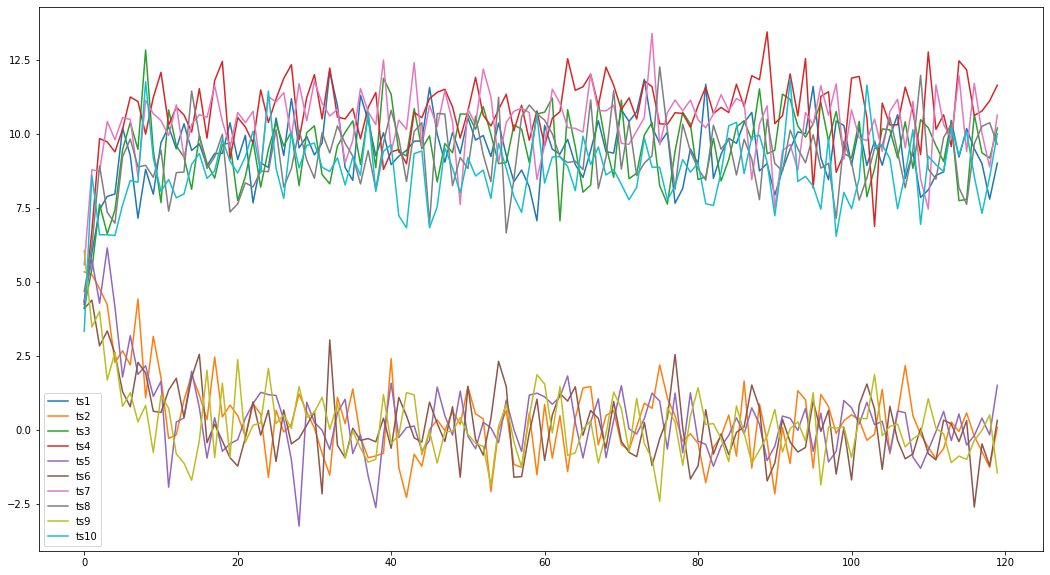

In [8]:
X.plot(figsize=(18,10))
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.show()

## Distance Matrix with SAX Encoding

We choose a window size 12. We reduct the 120 periods in 10 periods, a letter is a year.
You transpose X because each row must be a time series and each column a timestep.

In [9]:
sax = NaiveSAX(windows=12)

In [10]:
sax_strings = np.apply_along_axis(sax.fit_transform, 1, X.T)

## Dimensionality Reduction with **Piecewise Aggregate Approximation**

The **Piecewise Aggregate Approximation** consisting in taking the mean over back-to-back points. This decreases the number of points and reduces noise while preserving the trend of the time series.
The labels for each level form the **SAX String** (like *'AAA'*)

<br>

![PAA](https://www.researchgate.net/profile/Bill-Chiu-2/publication/221653289/figure/fig7/AS:668838362349575@1536474900462/Symbolic-aggregate-approximation-of-a-time-series-as-the-four-letter-word-dbad-The.ppm)

<br>

In [11]:
sax_strings

array(['ABCCABCBBA', 'CCBABBBACA', 'AABCCBACBB', 'ABCABCBCAB',
       'CCAABCBBBA', 'CCBBBCAABA', 'ABCCBBCABA', 'AABBBCCBAC',
       'CBCABCBABA', 'ABCABBACBC'], dtype='<U10')

In [12]:
# We reshape beacuse pdist wants a 2D array
sax1 = sax_strings.reshape(-1,1)

### Choose the distance: Levenshtein
The [***Levenshtein distance***](https://pypi.org/project/python-Levenshtein/) is a text similarity measure that compares two words and returns a numeric value representing the distance between them. The distance reflects the total number of single-character edits required to transform one word into another. The more similar the two words are the less distance between them, and vice versa. One common use for this distance is in the autocompletion or autocorrection features of text processors or chat applications.

<br>

![lev](https://www.statology.org/wp-content/uploads/2020/12/levenshtein1-300x288.png)

<br>

**The Levenshtein distance between the two words (i.e. the number of edits we have to make to turn one word into the other) would be 2.**

In [14]:
# at first time install Levenshtein with this command
#!pip install Levenshtein

     |████████████████████████████████| 159 kB 898 kB/s eta 0:00:01


In [15]:
from scipy.spatial.distance import pdist, squareform
from Levenshtein import distance as lev

In [16]:
distance_matrix=np.tril(squareform(pdist(sax1, lambda x,y: lev(x[0],y[0])), checks=True), k=-1)

In [17]:
distance_matrix[distance_matrix==0]=np.nan
print(distance_matrix)

[[nan nan nan nan nan nan nan nan nan nan]
 [ 6. nan nan nan nan nan nan nan nan nan]
 [ 4.  7. nan nan nan nan nan nan nan nan]
 [ 3.  6.  5. nan nan nan nan nan nan nan]
 [ 4.  4.  6.  6. nan nan nan nan nan nan]
 [ 6.  4.  7.  6.  4. nan nan nan nan nan]
 [ 2.  6.  4.  3.  6.  4. nan nan nan nan]
 [ 6.  6.  4.  6.  6.  5.  5. nan nan nan]
 [ 3.  4.  6.  3.  3.  4.  4.  7. nan nan]
 [ 5.  6.  4.  4.  7.  6.  4.  5.  4. nan]]


In [18]:
# find similar Time series
index_min = np.where(distance_matrix==np.nanmin(distance_matrix))

In [66]:
minL = []
for i in range(len(index_min)):
    minL.append(index_min[i].tolist())
minL = np.unique(np.reshape(minL, (-1)))

In [67]:
minL

array([0, 6])

In [68]:
for i in minL:
    print(sax_strings[i])

ABCCABCBBA
ABCCBBCABA


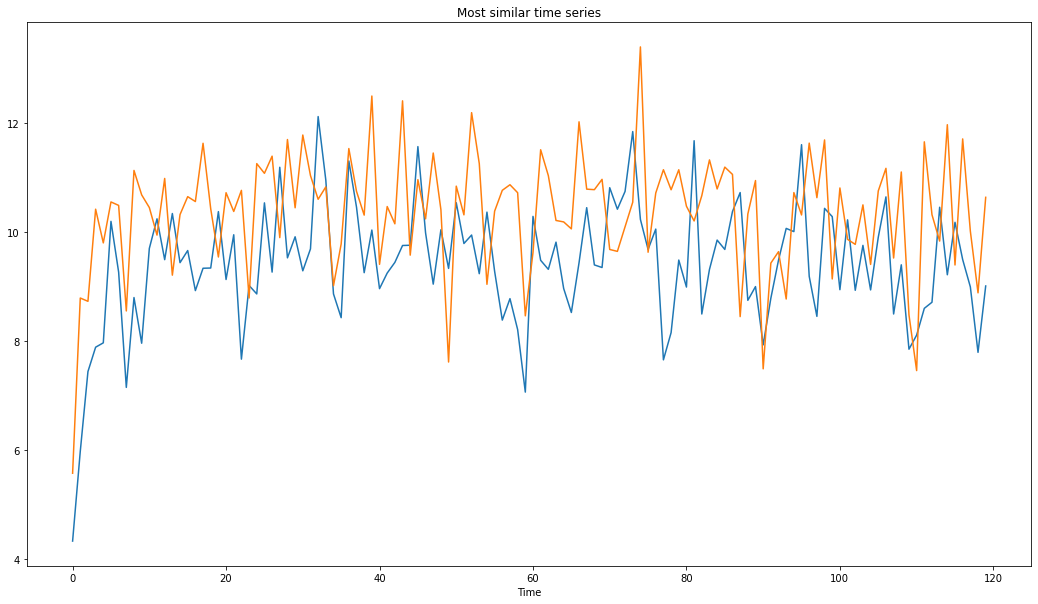

In [69]:
plt.figure(figsize=(18,10))
for i in minL:
    plt.plot(time, X.iloc[:,i].values)
plt.title("Most similar time series")
plt.xlabel("Time")
plt.show()

In [70]:
# find different Time series
# for the moment I don't take couples
index_max = np.where(distance_matrix==np.nanmax(distance_matrix))

In [71]:
maxL = []
for i in range(len(index_max)):
    maxL.append(index_max[i].tolist())
maxL = np.unique(np.reshape(maxL, (-1)))

In [75]:
for i in maxL:
    print(sax_strings[i])

CCBABBBACA
AABCCBACBB
CCAABCBBBA
CCBBBCAABA
AABBBCCBAC
CBCABCBABA
ABCABBACBC


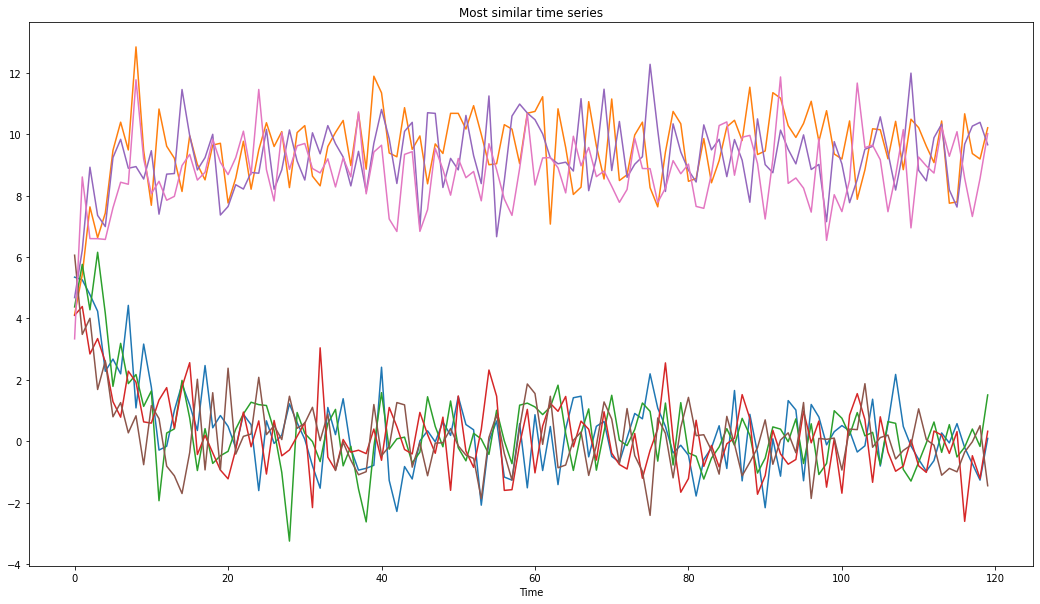

In [74]:
plt.figure(figsize=(18,10))
for i in maxL:
    plt.plot(time, X.iloc[:,i].values)
plt.title("Most similar time series")
plt.xlabel("Time")
plt.show()

## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

* *The **sigmoid** function was created by [Piero Savastano](https://github.com/pieroit) for [covid19italia](https://github.com/ondata/covid19italia/blob/master/visualizzazione/analisi_predittiva.ipynb)*

* *The **white_noise** function was created by [Aurélien Géron](https://github.com/ageron) for an Udacity course*
